In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')

from indra.common import Circle
from indra.mobius import MobiusTransformation as Mobius

In [2]:
# example to start with
theta = np.pi / 4

a = Mobius(1 / np.sin(theta) * np.array([[1, complex(0, np.cos(theta))], [complex(0, -np.cos(theta)), 1]]))
A = a.inv()
b = Mobius(1 / np.sin(theta) * np.array([[1, np.cos(theta)], [np.cos(theta), 1]]))
B = b.inv()

gens = [a, b, A, B]
fps = [x.sink() for x in gens]  # attracting fixed points

P = 1 / np.cos(theta)
r = np.tan(theta)

C_a = Circle(complex(0, P), r)
C_A = Circle(complex(0, -P), r)
C_b = Circle(complex(P, 0), r)
C_B = Circle(complex(-P, 0), r)

circs = [C_a, C_b, C_A, C_B]

In [6]:
# Iterate through limit points with depth-first search
def dfs(gens, fps, circs, eps=1e-5):
    for k in range(len(gens)):
        yield from explore_tree(gens[k], k, circs[k], gens, fps, eps)

        
def explore_tree(X, l, C, gens, fps, eps):
    n = len(gens)
    for k in range(l-1, l+1):
        Y = X(gens[k % n])
        if Y(C).radius < eps:
            yield Y(fps[k % n])
        else:
            yield from explore_tree(Y, k, C, gens, fps, eps)

In [7]:
def plot_limit_points(gens, fps, circs, eps=1e-5):
    """Plot limit points of set of Mobius transformations"""
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    
    pts = list(dfs(gens, fps, circs, eps=eps))
    ax.scatter([x.real for x in pts], [x.imag for x in pts], marker='.', s=10)

<IPython.core.display.Javascript object>


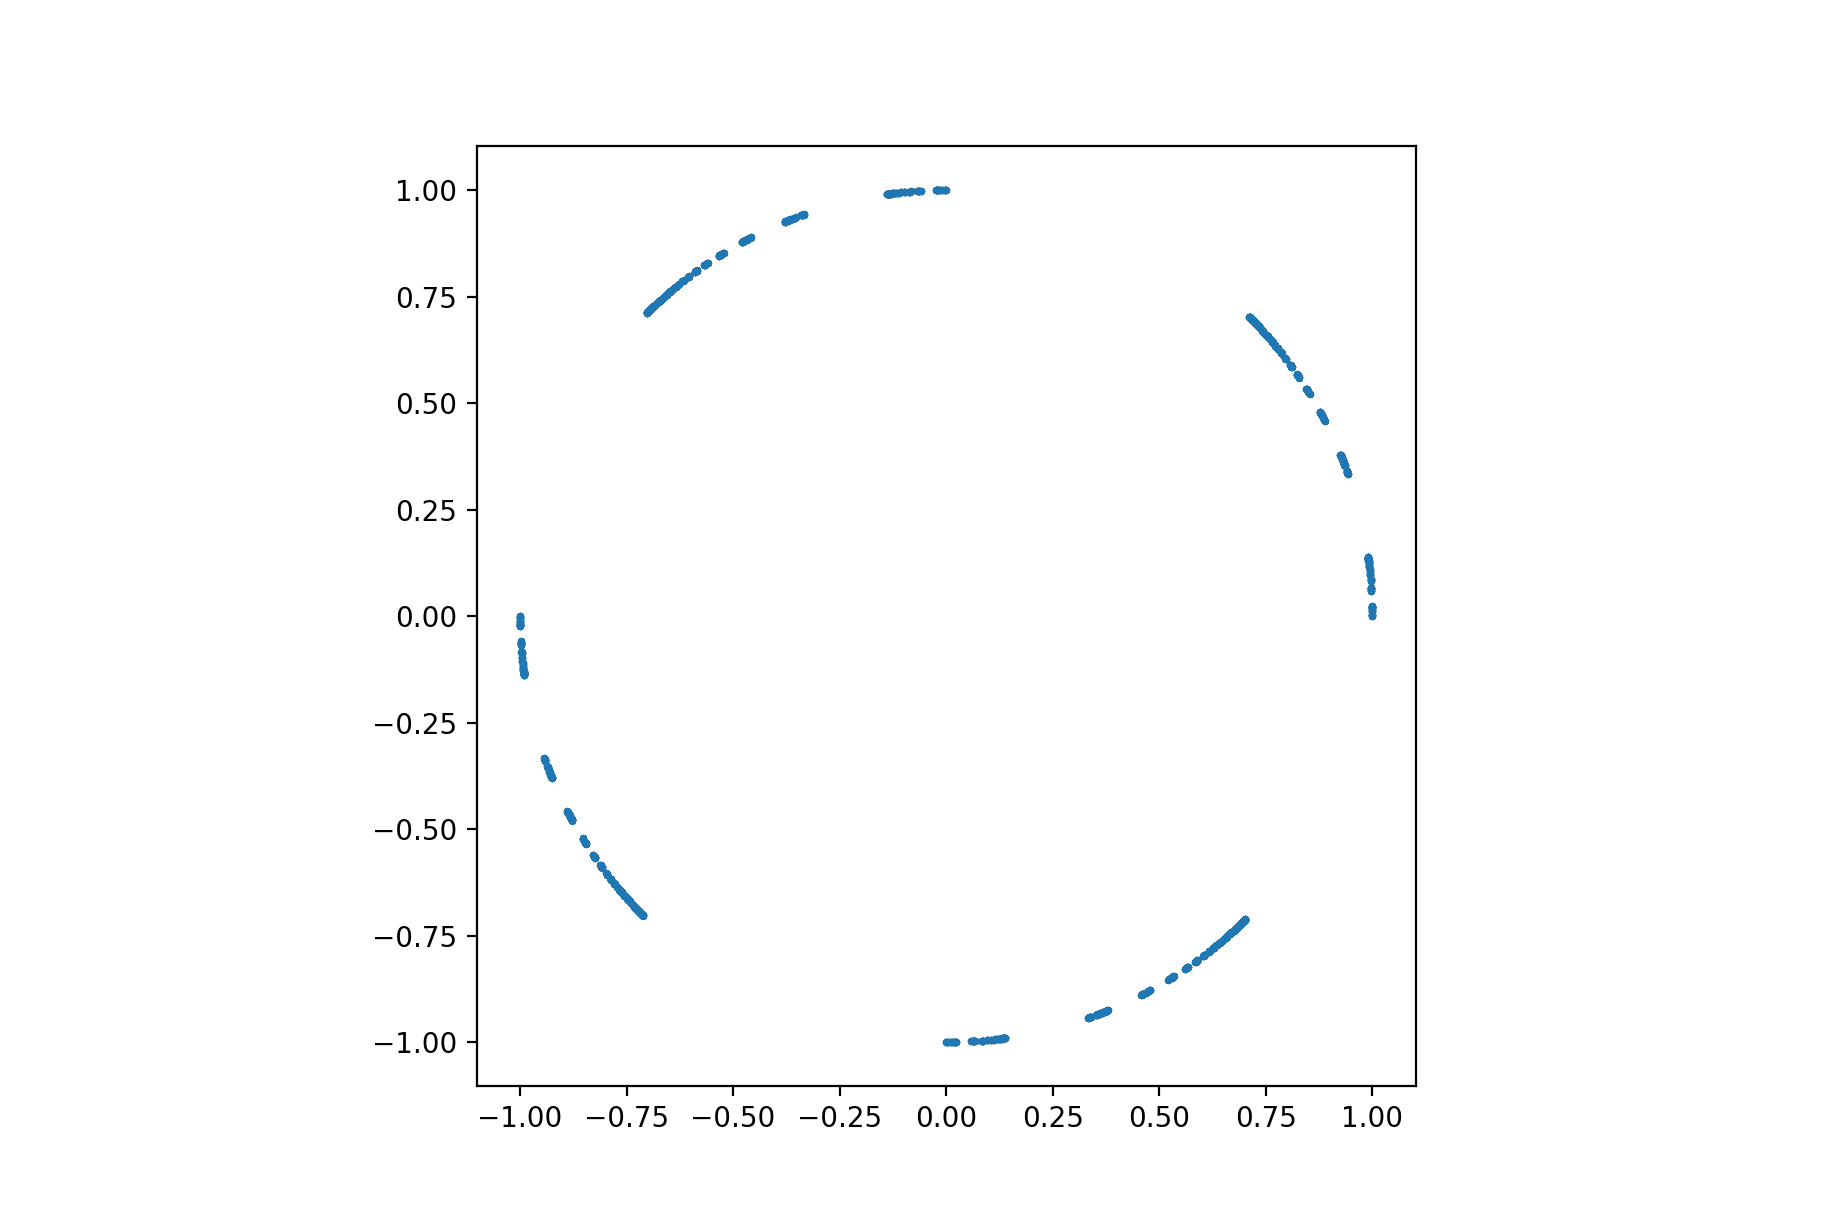

In [8]:
plot_limit_points(gens, fps, circs)